# TRABAJO PRÁCTICO Nº 3

**Alumnos:**
- Nahuel Arrieta
- Lucas moyano

In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(image_name):
  image_path = "./images/" + image_name

  # Read the image
  image = cv2.imread(image_path)
  if image is None:
    sys.exit("Could not read the image " + image_path)
  return image

In [3]:
def show_image(label, image):
  # Convert the image from BGR to RGB for displaying in Jupyter Notebook
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Display the image using Matplotlib
  plt.figure(figsize=(6, 6))
  plt.imshow(image_rgb, cmap='gray' if len(image.shape) == 2 else None)
  plt.title(label)
  plt.axis('off')
  plt.show()


## Sección 1: Operadores morfologicos

### 1. Erosión y dilatación básicas: Aplicar erosión y dilatación sobre una imagen binaria. Usar diferentes tamaños de kernel. Comparar la imagen original y la resultante de aplicar el operador. Comentar los efectos visuales.

In [14]:
def create_square_kernel(size):
    # Create a square kernel of given size with all ones
    kernel = np.ones((size, size), dtype=np.uint8)
    return kernel


def create_cross_kernel(size):
    # Create a cross-shaped kernel of given size with the center and cross set to 1
    kernel = np.zeros((size, size), dtype=np.uint8)
    kernel[size // 2, :] = 1
    kernel[:, size // 2] = 1
    return kernel


def create_diamond_kernel(size):
    # Create a diamond-shaped kernel of given size with the center and surrounding pixels set to 1
    kernel = np.zeros((size, size), dtype=np.uint8)
    for i in range(size):
        for j in range(size):
            if abs(i - size // 2) + abs(j - size // 2) <= size // 2:
                kernel[i, j] = 1
    return kernel


def create_circle_kernel(size):
    # Create a circular kernel of given size with the center and surrounding pixels set to 1
    kernel = np.zeros((size, size), dtype=np.uint8)
    radius = size // 2
    for i in range(size):
        for j in range(size):
            if (i - radius) ** 2 + (j - radius) ** 2 <= radius ** 2:
                kernel[i, j] = 1
    return kernel

square_kernel = "square"
cross_kernel = "cross"
diamond_kernel = "diamond"
circle_kernel = "circle"

def create_kernel(kernel_type, size):
    # Create a kernel based on the specified type and size
    if kernel_type == square_kernel:
        return create_square_kernel(size)
    elif kernel_type == cross_kernel:
        return create_cross_kernel(size)
    elif kernel_type == diamond_kernel:
        return create_diamond_kernel(size)
    elif kernel_type == circle_kernel:
        return create_circle_kernel(size)
    else:
        raise ValueError("Invalid kernel type. Choose from 'square', 'cross', 'diamond', or 'circle'.")
    


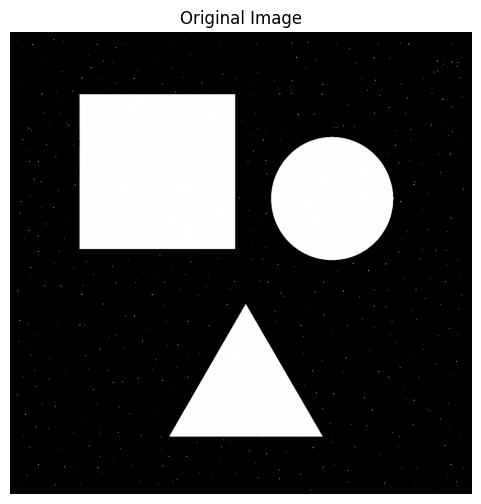

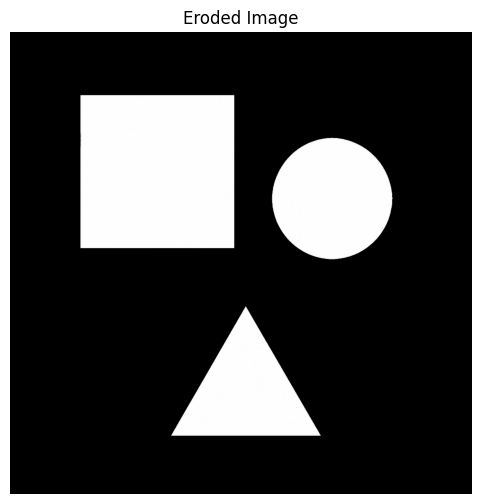

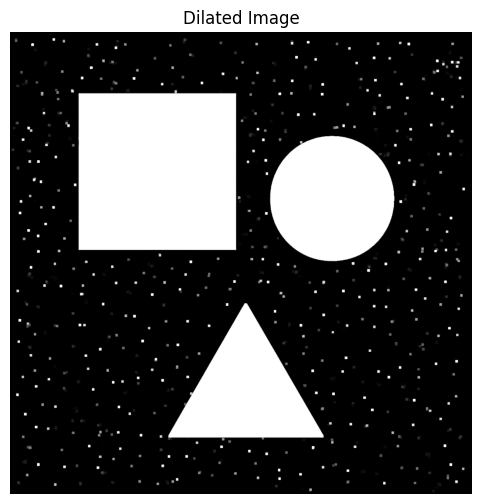

In [17]:
image = read_image("bin1.png")

## Aply erosion
kernel = create_kernel(square_kernel, 5)
eroded = cv2.erode(image, kernel, iterations=1)

## Apply dilation
kernel = create_kernel(square_kernel, 5)
dilated = cv2.dilate(image, kernel, iterations=1)

## Show the results
show_image("Original Image", image)
show_image("Eroded Image", eroded)
show_image("Dilated Image", dilated)

### 2. Erosion y dilatación sobre bordes detectados: Aplicar eroosion y dilatación sobre una imagen de bordes para ensanchar o suavizar lıneas.

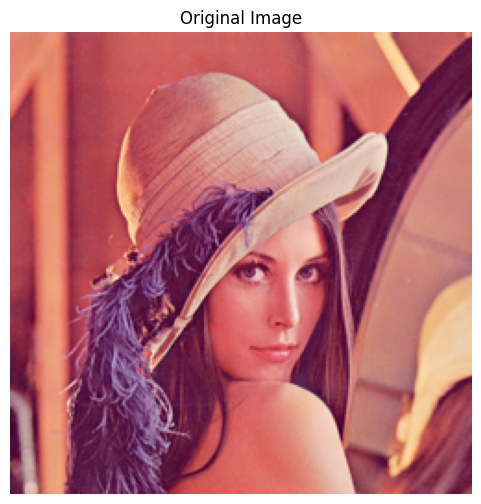

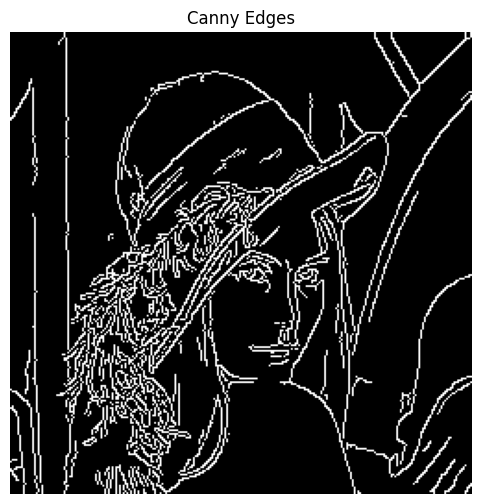

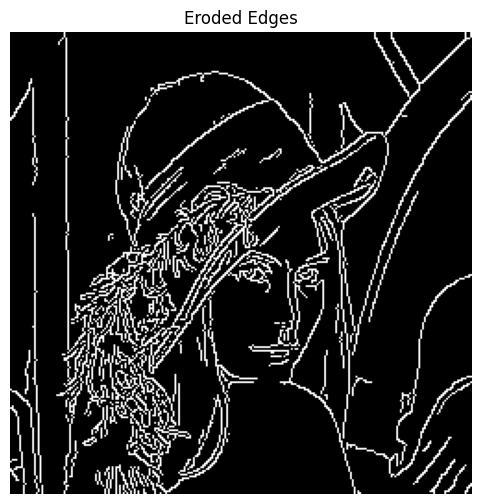

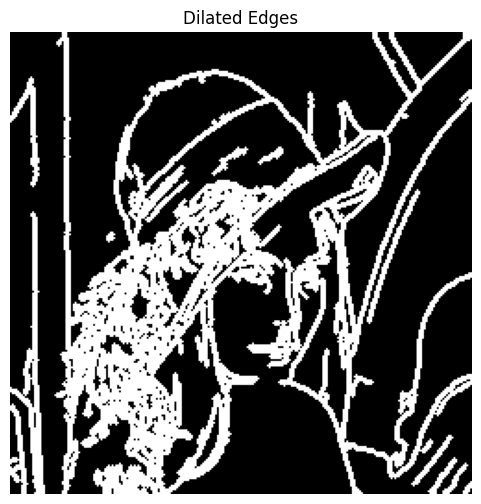

In [24]:
image = read_image("Lenna.png")

## Apply canny
edges = cv2.Canny(image, 100, 200)

## Erode the edges
kernel = create_kernel(circle_kernel, 1)
eroded_edges = cv2.erode(edges, kernel, iterations=1)

## Dilate the edges
kernel = create_kernel(circle_kernel, 3)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

## Show the results
show_image("Original Image", image)
show_image("Canny Edges", edges)
show_image("Eroded Edges", eroded_edges)
show_image("Dilated Edges", dilated_edges)



### 3. Relleno de objetos usando clausura morfol´ogica: Aplicar clausura morfol´ogico para rellenar objetos interrumpidos por ruido.

In [25]:
def closing(image, kernel):
    # Perform closing operation using dilation followed by erosion
    dilated = cv2.dilate(image, kernel, iterations=1)
    closed = cv2.erode(dilated, kernel, iterations=1)
    return closed

def opening(image, kernel):
    # Perform opening operation using erosion followed by dilation
    eroded = cv2.erode(image, kernel, iterations=1)
    opened = cv2.dilate(eroded, kernel, iterations=1)
    return opened


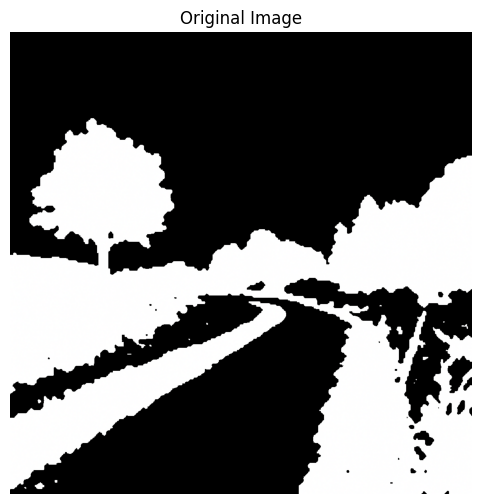

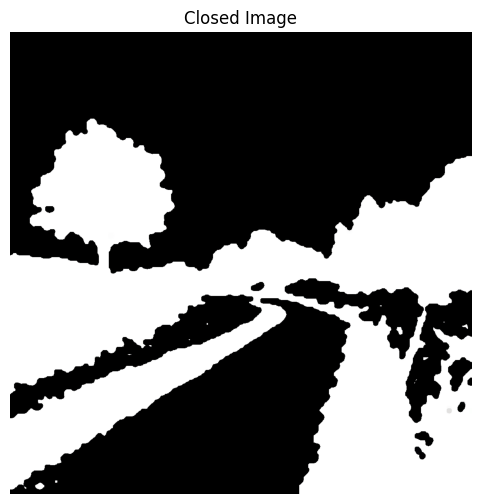

In [32]:
image = read_image("bin3.png")

## Apply closing
kernel = create_kernel(circle_kernel, 12)
closed_image = closing(image, kernel)

## Show the results
show_image("Original Image", image)
show_image("Closed Image", closed_image)

### 4. (*) Apertura y clausura morfol´ogica: Aplicar apertura y clausura para eliminar ruido o cerrar huecos. Comparar la imagen original y la resultante de aplicar el operador. Comentar los efectos visuales. Comparar con los resultados anteriores. Mostrar 4 subplots: original, apertura, cierre, diferencia entre ambos.

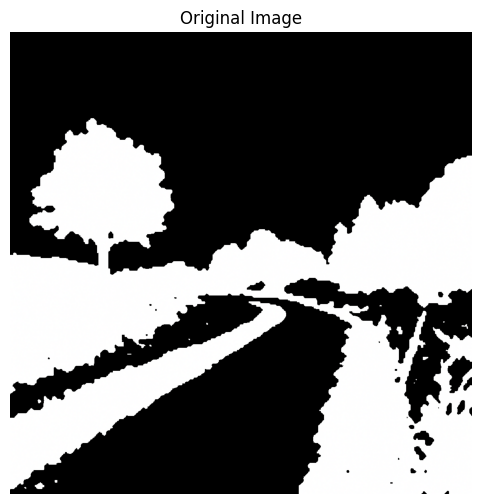

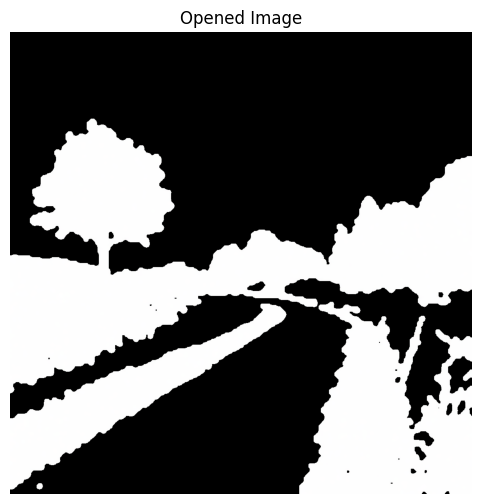

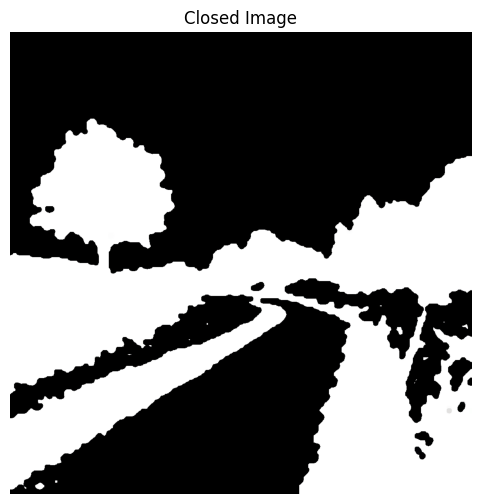

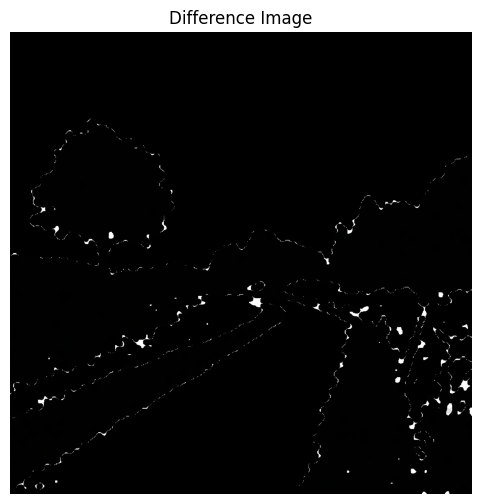

In [36]:
image = read_image("bin3.png")

## Apply opening
kernel = create_kernel(circle_kernel, 12)
opened_image = opening(image, kernel)


## Apply closing
kernel = create_kernel(circle_kernel, 12)
closed_image = closing(image, kernel)

## Calculate the difference
difference = cv2.absdiff(opened_image, closed_image)

## Show the results
show_image("Original Image", image)
show_image("Opened Image", opened_image)
show_image("Closed Image", closed_image)
show_image("Difference Image", difference)

### 5. (*) Operaci´on de gradiente morfol´ogico: Aplicar el gradiente morfol´ogico (dilataci´on - erosi´on). Visualizar los bordes obtenidos mediante esta operaci´on.

In [34]:
def morphological_gradient(image, kernel):
    # Perform morphological gradient using dilation and erosion
    dilated = cv2.dilate(image, kernel, iterations=1)
    eroded = cv2.erode(image, kernel, iterations=1)
    gradient = cv2.absdiff(dilated, eroded)
    return gradient


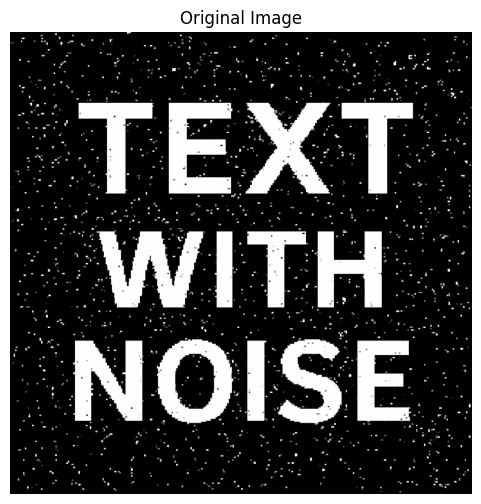

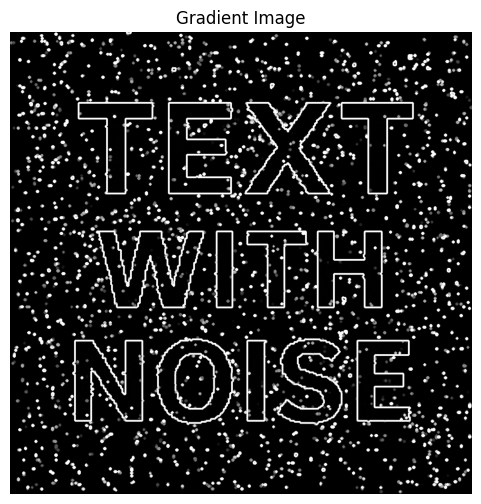

In [39]:
image = read_image("bin2.png")

## Apply morphological gradient
kernel = create_kernel(circle_kernel, 5)
gradient_image = morphological_gradient(image, kernel)

## Show the results
show_image("Original Image", image)
show_image("Gradient Image", gradient_image)

### 6. Detecci´on de bordes con morfolog´ıa: Generar una imagen de bordes usando diferencia entre la imagen original y su erosi´on o dilataci´on.

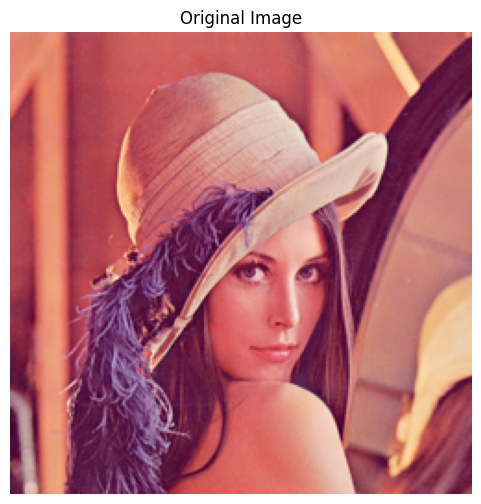

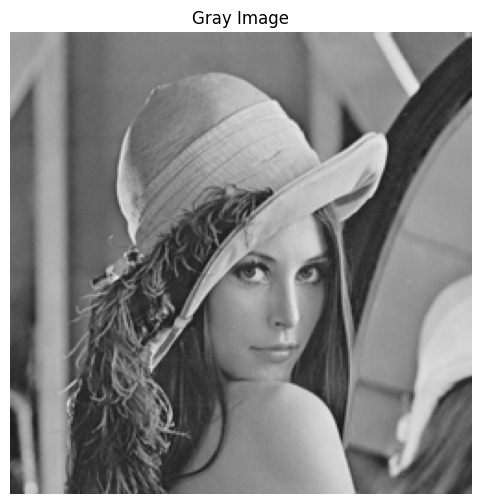

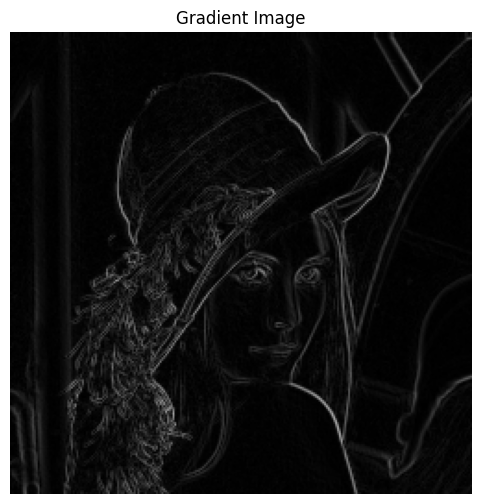

In [45]:
image = read_image("Lenna.png")

## Apply thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Apply morphological gradient
kernel = create_kernel(circle_kernel, 2)
gradient_image = morphological_gradient(gray_image, kernel)

## Show the results
show_image("Original Image", image)
show_image("Gray Image", gray_image)
show_image("Gradient Image", gradient_image)


### 7. (*) Segmentaci´on b´asica con umbral + morfolog´ıa: Aplicar umbral, luego apertura y cierre para mejorar el resultado. Ideal como paso previo a una segmentaci´on m´as elaborada.

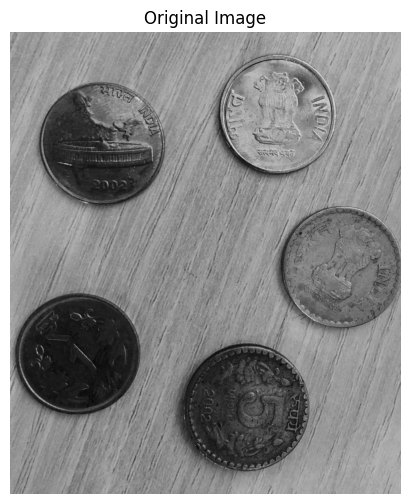

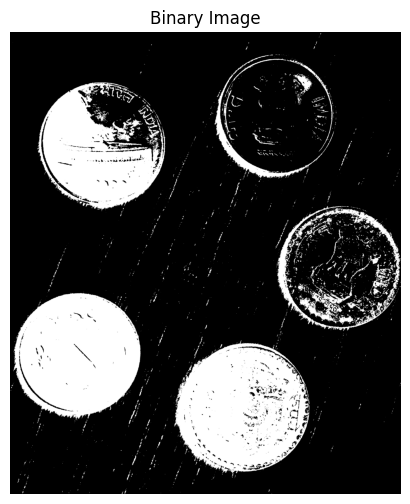

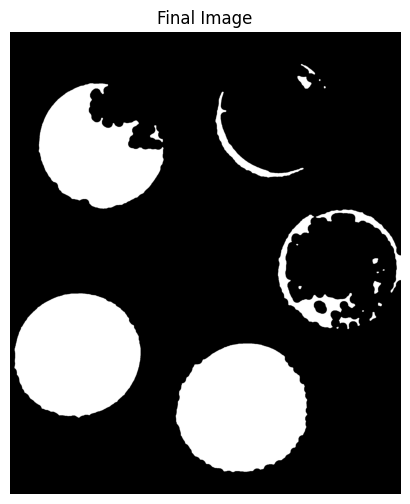

In [89]:
image = read_image("coins.jpg")

## Apply thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_image = cv2.bitwise_not(binary_image)

show_image("Original Image", image)
show_image("Binary Image", binary_image)

# ## Closing
kernel = create_kernel(circle_kernel, 50)
binary_image = closing(opened_image, kernel)


## Opening
kernel = create_kernel(circle_kernel, 5)
binary_image = opening(binary_image, kernel)


## Show the results
show_image("Final Image", binary_image)
